### Preprocess
- Re-categorizing ascending to descending, or vice versa doesn't have any impact the model accuracy.
- Use one hot encoder to set 'sex'? Gender seem binary '1' or '0' -- Can be ignored since it is a binary class.
- cp should be descending
- slope should be descending Downslop (severe), Horizontal and upsloping
- Use one hot encoder to set 'thal'c-- Can be ignored for (or experiment later)
\
DON'T WASTE TIME!!

Method:
1. Test Standardization vs Scaling with base model
2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [67]:
data = pd.read_csv('data/uci-heart-disease/cleveland-cleaned.csv')
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [68]:
X = data.drop('target', axis=1)
y = data['target']

columns = X.columns
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [ ]:
y

## Feature Selection

In [69]:
from sklearn.feature_selection import chi2,SelectKBest

chi_squared = SelectKBest(score_func=chi2, k=13)
chi_squared.fit(X, y)
feature_score = pd.DataFrame({"Score":chi_squared.scores_, "P_Value":np.round(chi_squared.pvalues_,3)}, index=X.columns)
feature_score.nlargest(n=13,columns="Score")

,Score,P_Value
thalach,187.053104,0.000
ca,82.730613,0.000
oldpeak,68.570533,0.000
thal,65.221093,0.000
exang,35.508090,0.000
age,22.917697,0.000
chol,20.855084,0.000
trestbps,16.707463,0.000
cp,14.591587,0.000
restecg,8.134652,0.004


## Cross Balancing

Counter({0: 160, 1: 160})


(320, 13)

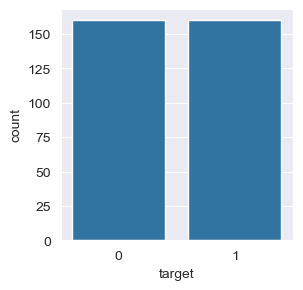

In [70]:
from collections import Counter
# Need to install imbalanced-learn
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)

plt.subplots(figsize=(3,3))
sns.countplot(x=y_b)
print(Counter(y_b))
X_b.shape

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.20, random_state=0)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [ ]:
X_test[0:5]

In [ ]:
y_test.head()

# Base model
- classification report
- confusion matrix

In [73]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc=accuracy_score(y_test, y_pred)*100
print("SVM - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

SVM - Accuracy: 56.250.

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        28
           1       0.64      0.50      0.56        36

    accuracy                           0.56        64
   macro avg       0.57      0.57      0.56        64
weighted avg       0.58      0.56      0.56        64



In [ ]:
# There were 60 records in test with equal class (1 and 0).
# Meanwhile, the prediction was 24:36
pd.DataFrame(y_pred).value_counts()

- <b>Precision</b> - 92% (22/24) prediction was correct in overall disease prediction
- <b>Recall</b> - 73% (22/30) prediction for disease was correct

In [74]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18 10]
 [18 18]]


In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues', cbar=False)
# plt.ylabel('Actual');
# plt.xlabel('Predicted');
plt.ylabel('Truth');
plt.xlabel('Predicted');
plt.title("Confusion Matrix for Predicting Heart Disease (True=1, False=0)", size=12);

### GridSerachCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import arange
grid_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

# grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=5)

grid_search_svc.fit(X_train,y_train)
best_parameters_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print(best_parameters_svc)
print(best_score_svc)

y_pred = grid_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

### RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import arange
rand_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

rand_search_svc = RandomizedSearchCV(rand_svc, parameters, scoring='accuracy', cv=5)

rand_search_svc.fit(X_train,y_train)
best_parameters_svc = rand_search_svc.best_params_
best_score_svc = rand_search_svc.best_score_
print(best_parameters_svc)
print(best_score_svc)

y_pred = rand_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))
print("\nClassification Report")
print(classification_report(y_test, y_pred))